In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import matplotlib.pyplot as plt

In [4]:
from pyannote.core import Annotation, Segment

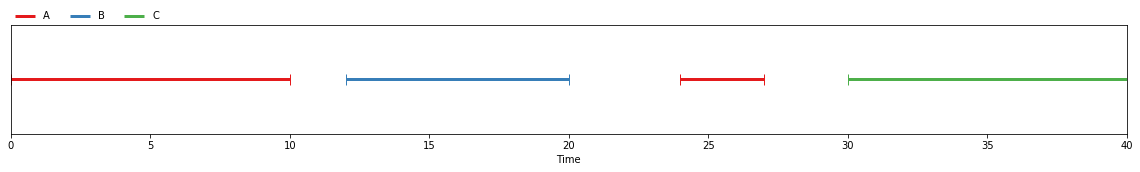

In [5]:
reference = Annotation()
reference[Segment(0, 10)] = 'A'
reference[Segment(12, 20)] = 'B'
reference[Segment(24, 27)] = 'A'
reference[Segment(30, 40)] = 'C'
reference

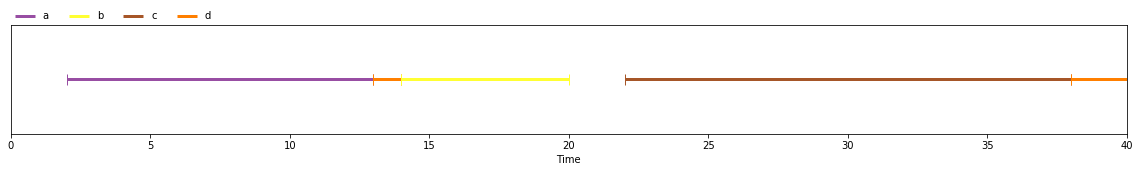

In [6]:
hypothesis = Annotation()
hypothesis[Segment(2, 13)] = 'a'
hypothesis[Segment(13, 14)] = 'd'
hypothesis[Segment(14, 20)] = 'b'
hypothesis[Segment(22, 38)] = 'c'
hypothesis[Segment(38, 40)] = 'd'
hypothesis

# DER

In [21]:
from pyannote.metrics.diarization import DiarizationErrorRate
diarizationErrorRate = DiarizationErrorRate()
print("DER = {0:.3f}".format(diarizationErrorRate(reference, hypothesis, uem=Segment(0, 40))))


DER = 0.516


In [14]:
diarizationErrorRate.optimal_mapping(reference, hypothesis)

{'a': 'A', 'b': 'B', 'c': 'C'}

In [26]:
from pprint import pprint
diarizationErrorRate = DiarizationErrorRate()
pprint(diarizationErrorRate(reference, hypothesis, detailed=True, uem=Segment(0, 40)))

{'confusion': 7.0,
 'correct': 22.0,
 'diarization error rate': 0.5161290322580645,
 'false alarm': 7.0,
 'missed detection': 2.0,
 'total': 31.0}



# Clusters purity and coverage


In [9]:
from pyannote.metrics.diarization import DiarizationPurity
purity = DiarizationPurity()
print("Purity = {0:.3f}".format(purity(reference, hypothesis, uem=Segment(0, 40))))

Purity = 0.828


In [10]:
from pyannote.metrics.diarization import DiarizationCoverage
coverage = DiarizationCoverage()
print("Coverage = {0:.3f}".format(coverage(reference, hypothesis, uem=Segment(0, 40))))

Coverage = 0.759


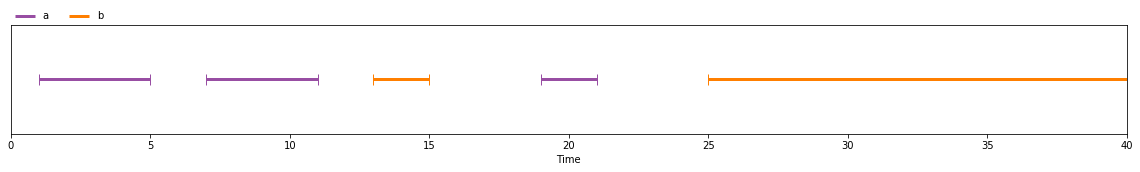

In [19]:
# Need a file with start and end at seconds level information
# Create a csv file in the format: start-sec,end-sec,label
# read the labeled data
data_path = 'data/labeled-data/example.csv'
segments = []
with open(data_path) as f:
    for line in f:
        if line.strip():
            _tmp = line.strip().split(',')
            segments.append([int(_tmp[0]), int(_tmp[1]), _tmp[2]])

reference = Annotation()
for seg in segments:
    reference[Segment(seg[0], seg[1])] = seg[2]
reference


In [24]:
type(reference)

pyannote.core.annotation.Annotation

In [25]:
reference.chart()

[('c', 35), ('b', 27), ('a', 20)]

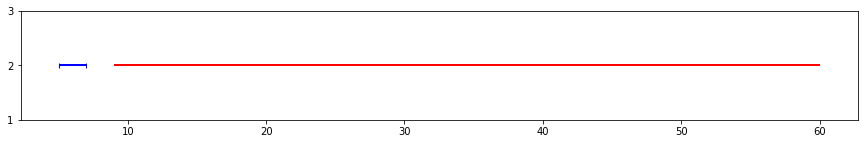

In [49]:
fig, ax = plt.subplots(figsize=(15, 2))
y=2
# draw segment
ax.hlines(2, 5, 7, 'blue',
         linewidth=2, linestyle='solid', label='c')
ax.hlines(2, 9, 60, 'red',
         linewidth=2, linestyle='solid', label='a')

ax.vlines(5, y + 0.05, y - 0.05,
          'blue', linewidth=1, linestyle='solid')
ax.vlines(7, y + 0.05, y - 0.05, 'blue', linewidth=1, linestyle='solid')

plt.yticks(range(1,4))
plt.show()